In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [34]:
dataset_raw = pd.read_csv("../../raw_data/daneSkinCare.csv")
dataset = pd.read_csv("../../prepared_data/DATASET.csv", encoding='utf-16')
labeled_data = pd.read_csv("../../prepared_data/labeledDataset.csv")
products = pd.read_csv("../../raw_data/products.csv", sep=';')

In [20]:
dataset_raw.head(3)

,Typ cery,Wrażliwa,Główny problem,Poboczny problem,Wiek,Mycie,Serum na dzień,Krem na dzień,SPF,Serum na noc,Krem na noc,Punktowo,Maseczka,Peeling
0,Tlusta,0,Nadprodukcja sebum,Niedoskonałości,17,Neutrogena Visibly Clear Clear & Defend Facial...,Revox Just Niacinamide 10%,Tołpa - Authentic - Krem Matowa Skóra,SVR Sebiaclear Creme SPF 50,Eveline Cosmetics Beauty & Glow Matujące Serum...,SVR Sebiaclear Hydra,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nature Qu...,Brak
1,Mieszana,1,Nadprodukcja sebum,Niedoskonałości,20,Pharmaceris T Puri-Sebogel - antybakteryjny że...,Revox Just Niacinamide 10%,Bandi Medical Expert Anti Dry Emulsja silnie n...,Missha - All-Around Safe Block Aqua Sun Gel SP...,The Ordinary - Niacinamide 10% + Zinc 1% - Ser...,SVR Sebiaclear Hydra,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nacomi Bi...,BANDI ANTI ACNE antytrądzikowy peeling kwasowy...
2,Mieszana,1,Nadprodukcja sebum,Niedoskonałości,20,Pharmaceris T Puri-Sebogel - antybakteryjny że...,Revox Just Niacinamide 10%,Cetaphil - Pro Oil Control SPF30 - Krem Nawilż...,Missha - All-Around Safe Block Aqua Sun Gel SP...,The Ordinary - Niacinamide 10% + Zinc 1% - Ser...,Dermedic Melumin,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nacomi Bi...,BANDI ANTI ACNE antytrądzikowy peeling kwasowy...


In [21]:
dataset.head(3)

,Typ cery,Wrażliwa,Główny problem,Poboczny problem,Wiek,Mycie,Serum na dzień,Krem na dzień,SPF,Serum na noc,Krem na noc,Punktowo,Maseczka,Peeling
0,Tłusta,0,Nadprodukcja sebum,Niedoskonałości,17,Neutrogena Visibly Clear Clear & Defend Facial...,Revox Just Niacinamide 10%,Tołpa - Authentic - Krem Matowa Skóra,SVR Sebiaclear Creme SPF 50,Eveline Cosmetics Beauty & Glow Matujące Serum...,SVR Sebiaclear Hydra,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nature Qu...,Brak
1,Mieszana,1,Nadprodukcja sebum,Niedoskonałości,20,Pharmaceris T Puri-Sebogel - antybakteryjny że...,Revox Just Niacinamide 10%,Bandi Medical Expert Anti Dry Emulsja silnie n...,Missha - All-Around Safe Block Aqua Sun Gel SP...,The Ordinary - Niacinamide 10% + Zinc 1% - Ser...,SVR Sebiaclear Hydra,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nacomi Bi...,BANDI ANTI ACNE antytrądzikowy peeling kwasowy...
2,Mieszana,1,Nadprodukcja sebum,Niedoskonałości,20,Pharmaceris T Puri-Sebogel - antybakteryjny że...,Revox Just Niacinamide 10%,Cetaphil - Pro Oil Control SPF30 - Krem Nawilż...,Missha - All-Around Safe Block Aqua Sun Gel SP...,The Ordinary - Niacinamide 10% + Zinc 1% - Ser...,Dermedic Melumin,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nacomi Bi...,BANDI ANTI ACNE antytrądzikowy peeling kwasowy...


In [22]:
labeled_data.head(3)

,Typ cery,Wrażliwa,Główny problem,Poboczny problem,Wiek,Mycie,Serum na dzień,Krem na dzień,SPF,Serum na noc,Krem na noc,Punktowo,Maseczka,Peeling
0,3,0,0,2,17,16,12,19,12,4,15,1,10,2
1,0,1,0,2,20,19,12,2,5,11,15,1,9,0
2,0,1,0,2,20,19,12,10,5,11,9,1,9,0


In [42]:
products.head(3)

,Acnederm,APIS COUPEROSE-STOP SERUM DLA CERY Z PROBLEMAMI NACZYNKOWYMI,APIS Maska Ściągająco-Wygładzająca z Białą Glinką i Cynkiem,Avene Cleanance Women,Bandi - Delicate Care - Kojący Krem Matujący,Bandi - Sebo Care - Pasta Punktowa na Niedoskonałości z Kalaminą,BANDI ANTI ACNE antytrądzikowy peeling kwasowy do twarzy,BANDI ANTI DRY peeling kwasowy do twarzy silnie nawilżający,Bandi Medical Expert Anti Dry Emulsja silnie nawilżająca,Bandi Medical Expert Anti Dry Kremowa kuracja nawilżająco-naprawcza,...,Tołpa - Authentic - Krem Matowa Skóra,Tołpa - Dermo Face Strefa T - Matujący Krem-Żel Nawilżający,Tołpa - Pre Age - Matujące Serum Normalizujące - 20ml,Tołpa Authentic Nawilżona Skóra,TOŁPA DERMO FACE SEBIO peeling 3 enzymy,TOŁPA DERMO FACE STREFA T nawilżające serum-booster,Uriage Roseliane SPF30 krem do cery naczynkowej,Vianek Nawilżająca Emulsja Myjąca do Twarzy,Żel Tołpa Dermo Face Physio,Brak
0,https://image.ceneostatic.pl/data/products/648...,https://wizaz24.pl/image/7444732a7hz44phbgk2d,https://kosme.pl/pol_pl_Maska-sciagajaco-wygla...,https://image.ceneostatic.pl/data/article_pict...,https://static.wizaz.pl/media/images/kwc/produ...,https://www.bandi.pl/pct/preparaty972@1_0.jpg,https://static.wizaz.pl/media/cache/500x500/kw...,https://image.ceneostatic.pl/data/article_pict...,https://static.wizaz.pl/media/cache/500x500/kw...,https://static.wizaz.pl/media/cache/500x500/kw...,...,https://wizaz24.pl/image/ar5f4kpexd7uwk5kaxtu,https://static.wizaz.pl/media/images/kwc/produ...,https://cosibella.pl/pol_pl_Tolpa-Pre-Age-Matu...,https://static.wizaz.pl/media/images/kwc/produ...,https://image.ceneostatic.pl/data/products/117...,https://image.ceneostatic.pl/data/products/822...,https://static.wizaz.pl/media/cache/500x500/kw...,https://static.wizaz.pl/media/cache/500x500/kw...,https://static.wizaz.pl/media/images/kwc/produ...,0


In [45]:
DECISION_COLUMN_NAMES = ['Mycie',
'Serum na dzień',
'Krem na dzień',
'SPF',
'Serum na noc',
'Krem na noc',
'Punktowo',
'Maseczka',
'Peeling'
]

#count unique values in column from decision column names
sum = 0
for column in DECISION_COLUMN_NAMES:
    print(column,":",dataset[column].nunique())
    sum += dataset[column].nunique()

print("Suma unikalnych wartości:", sum)


Mycie : 24
Serum na dzień : 19
Krem na dzień : 23
SPF : 16
Serum na noc : 13
Krem na noc : 20
Punktowo : 13
Maseczka : 12
Peeling : 10
Suma unikalnych wartości: 150


In [23]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Typ cery          225 non-null    object
 1   Wrażliwa          225 non-null    int64 
 2   Główny problem    225 non-null    object
 3   Poboczny problem  225 non-null    object
 4   Wiek              225 non-null    int64 
 5   Mycie             225 non-null    object
 6   Serum na dzień    225 non-null    object
 7   Krem na dzień     225 non-null    object
 8   SPF               225 non-null    object
 9   Serum na noc      225 non-null    object
 10  Krem na noc       225 non-null    object
 11  Punktowo          225 non-null    object
 12  Maseczka          225 non-null    object
 13  Peeling           225 non-null    object
dtypes: int64(2), object(12)
memory usage: 24.7+ KB


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5218 entries, 0 to 5217
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Typ cery          5218 non-null   object
 1   Wrażliwa          5218 non-null   int64 
 2   Główny problem    5218 non-null   object
 3   Poboczny problem  5218 non-null   object
 4   Wiek              5218 non-null   int64 
 5   Mycie             5218 non-null   object
 6   Serum na dzień    5218 non-null   object
 7   Krem na dzień     5218 non-null   object
 8   SPF               5218 non-null   object
 9   Serum na noc      5218 non-null   object
 10  Krem na noc       5218 non-null   object
 11  Punktowo          5218 non-null   object
 12  Maseczka          5218 non-null   object
 13  Peeling           5218 non-null   object
dtypes: int64(2), object(12)
memory usage: 570.8+ KB


In [25]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5218 entries, 0 to 5217
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Typ cery          5218 non-null   int64
 1   Wrażliwa          5218 non-null   int64
 2   Główny problem    5218 non-null   int64
 3   Poboczny problem  5218 non-null   int64
 4   Wiek              5218 non-null   int64
 5   Mycie             5218 non-null   int64
 6   Serum na dzień    5218 non-null   int64
 7   Krem na dzień     5218 non-null   int64
 8   SPF               5218 non-null   int64
 9   Serum na noc      5218 non-null   int64
 10  Krem na noc       5218 non-null   int64
 11  Punktowo          5218 non-null   int64
 12  Maseczka          5218 non-null   int64
 13  Peeling           5218 non-null   int64
dtypes: int64(14)
memory usage: 570.8 KB


In [38]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 62 columns):
 #   Column                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                            --------------  ----- 
 0   Acnederm                                                                                                                          1 non-null      object
 1   APIS COUPEROSE-STOP SERUM DLA CERY Z PROBLEMAMI NACZYNKOWYMI                                                                      1 non-null      object
 2   APIS Maska Ściągająco-Wygładzająca z Białą Glinką i Cynkiem                                                                       1 non-null      object
 3   Avene Cleanance Women                                                                                   

In [26]:
for column in labeled_data:
    print(column, np.unique(labeled_data[column]))

Typ cery [0 1 2 3]
Wrażliwa [0 1]
Główny problem [0 1 2 3 4 5 6 7]
Poboczny problem [0 1 2 3 4 5 6 7 8 9]
Wiek [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Mycie [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Serum na dzień [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Krem na dzień [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
SPF [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Serum na noc [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Krem na noc [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Punktowo [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Maseczka [ 0  1  2  3  4  5  6  7  8  9 10 11]
Peeling [0 1 2 3 4 5 6 7 8 9]


Wizualizacja danych po przetworzeniu

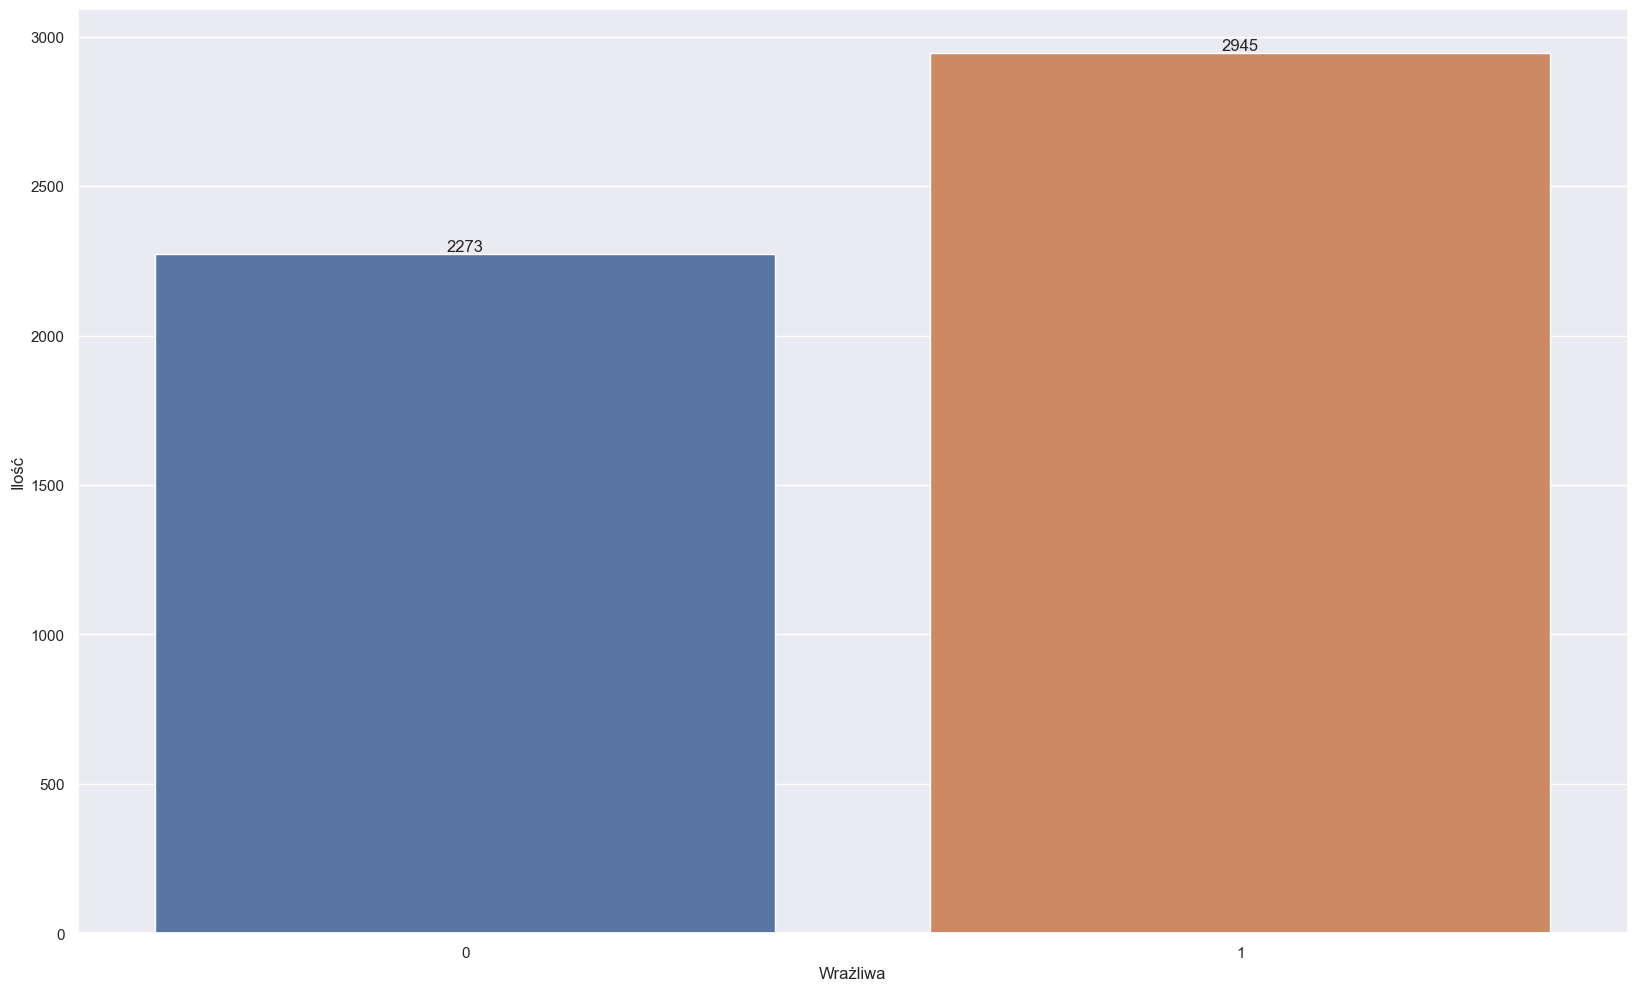

In [27]:
sn.set(rc={'figure.figsize':(20,12)})
isSenstivieBar = sn.countplot(x="Wrażliwa", data=dataset)
isSenstivieBar.set(ylabel='Ilość')
isSenstivieBar.bar_label(isSenstivieBar.containers[0])

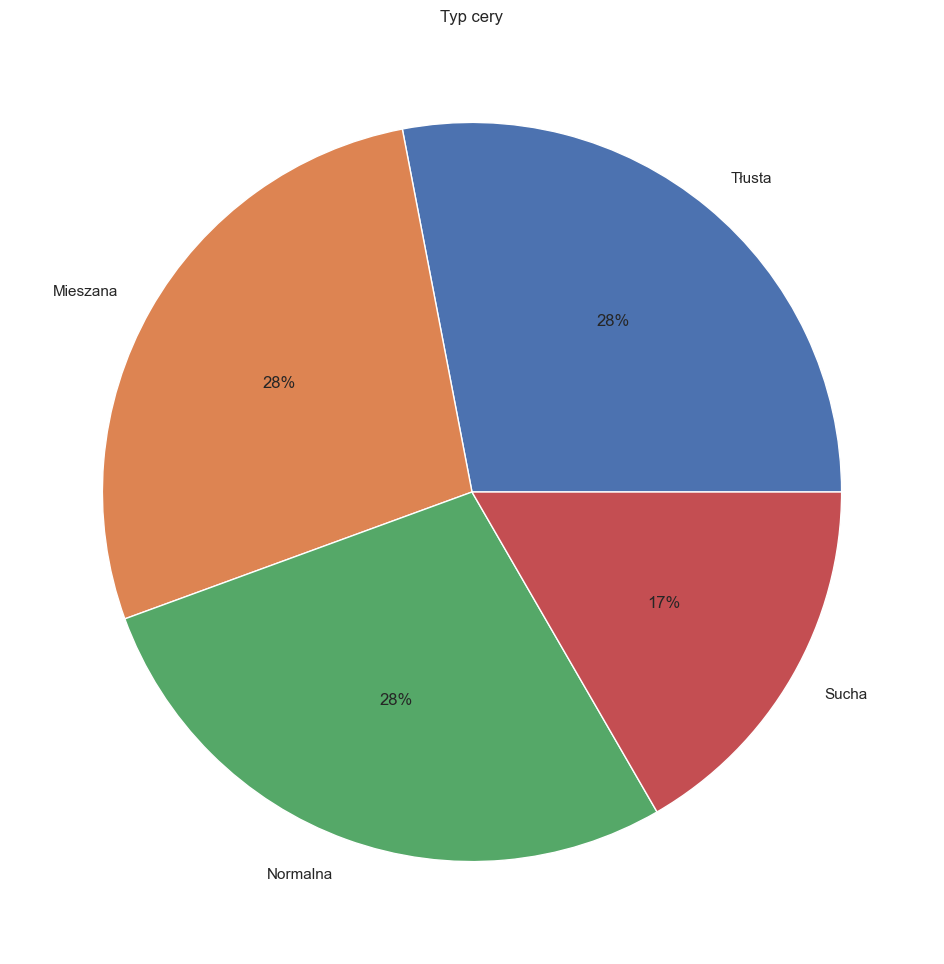

In [28]:
data = [dataset['Typ cery'].value_counts()['Tłusta'], dataset['Typ cery'].value_counts()['Mieszana'], dataset['Typ cery'].value_counts()['Normalna'], dataset['Typ cery'].value_counts()['Sucha']]
labels = ['Tłusta', 'Mieszana', 'Normalna', 'Sucha']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.title('Typ cery')
plt.show()

[Text(0, 0, '758'),
 Text(0, 0, '1424'),
 Text(0, 0, '765'),
 Text(0, 0, '519'),
 Text(0, 0, '420'),
 Text(0, 0, '178'),
 Text(0, 0, '409'),
 Text(0, 0, '745')]

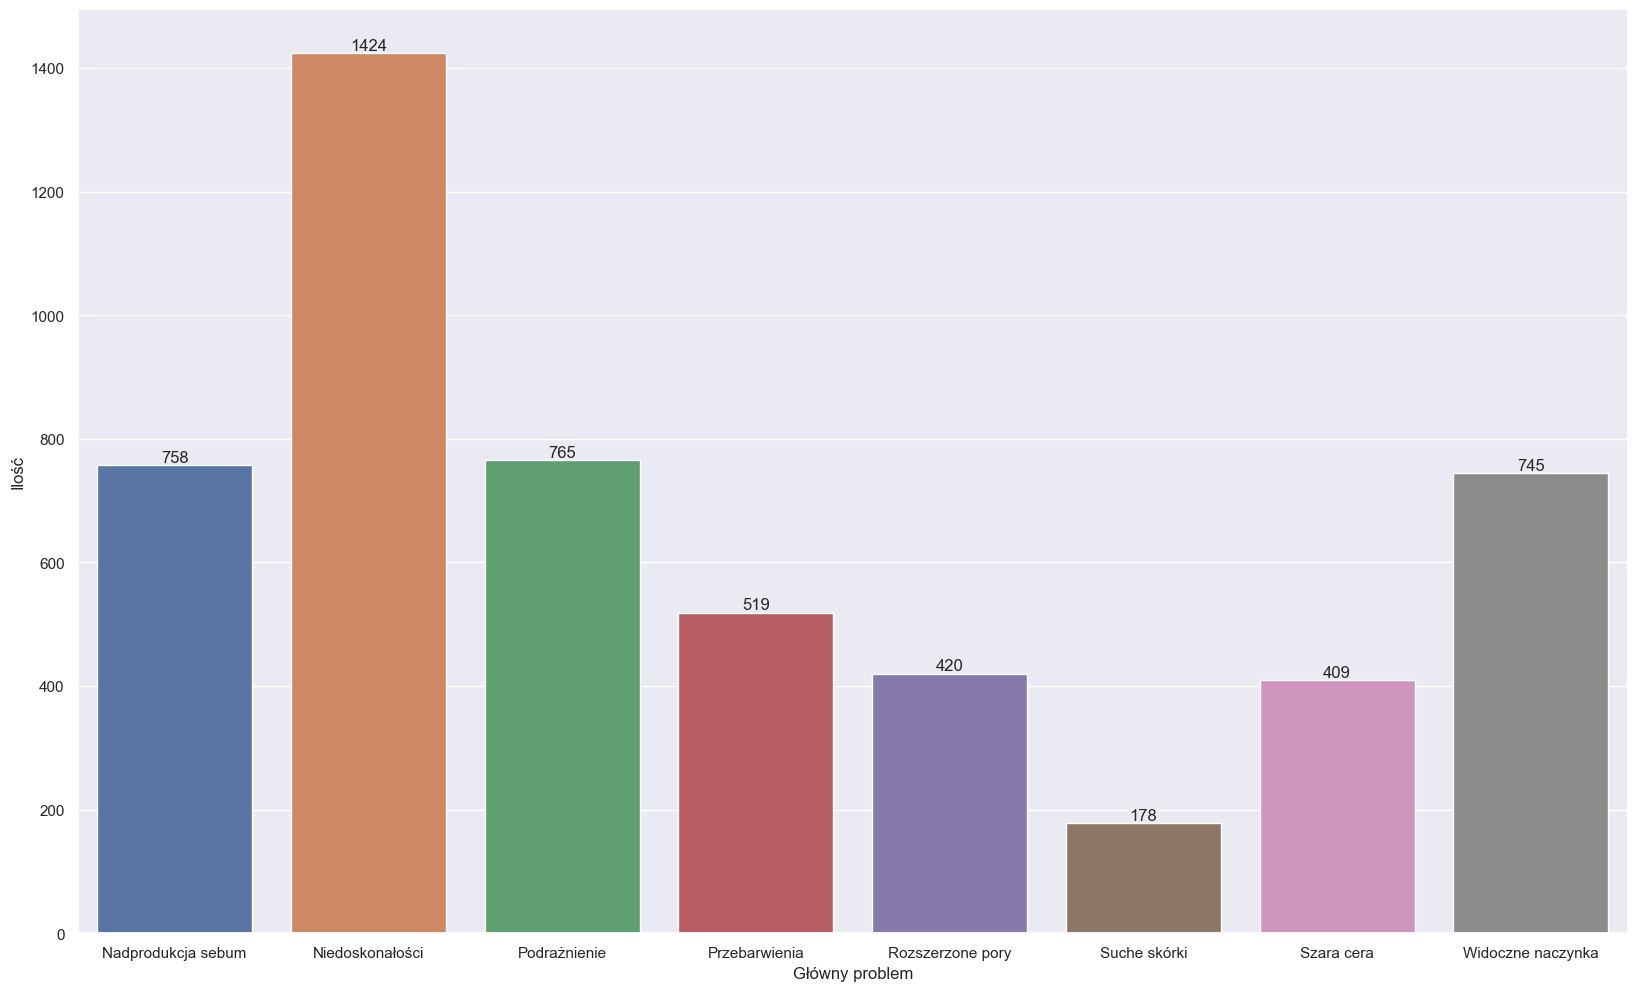

In [29]:
mainIssue = sn.countplot(x="Główny problem", data=dataset)
mainIssue.set(ylabel='Ilość')
mainIssue.bar_label(mainIssue.containers[0])

[Text(0, 0, '498'),
 Text(0, 0, '590'),
 Text(0, 0, '804'),
 Text(0, 0, '1722'),
 Text(0, 0, '812'),
 Text(0, 0, '379'),
 Text(0, 0, '59'),
 Text(0, 0, '109'),
 Text(0, 0, '22'),
 Text(0, 0, '223')]

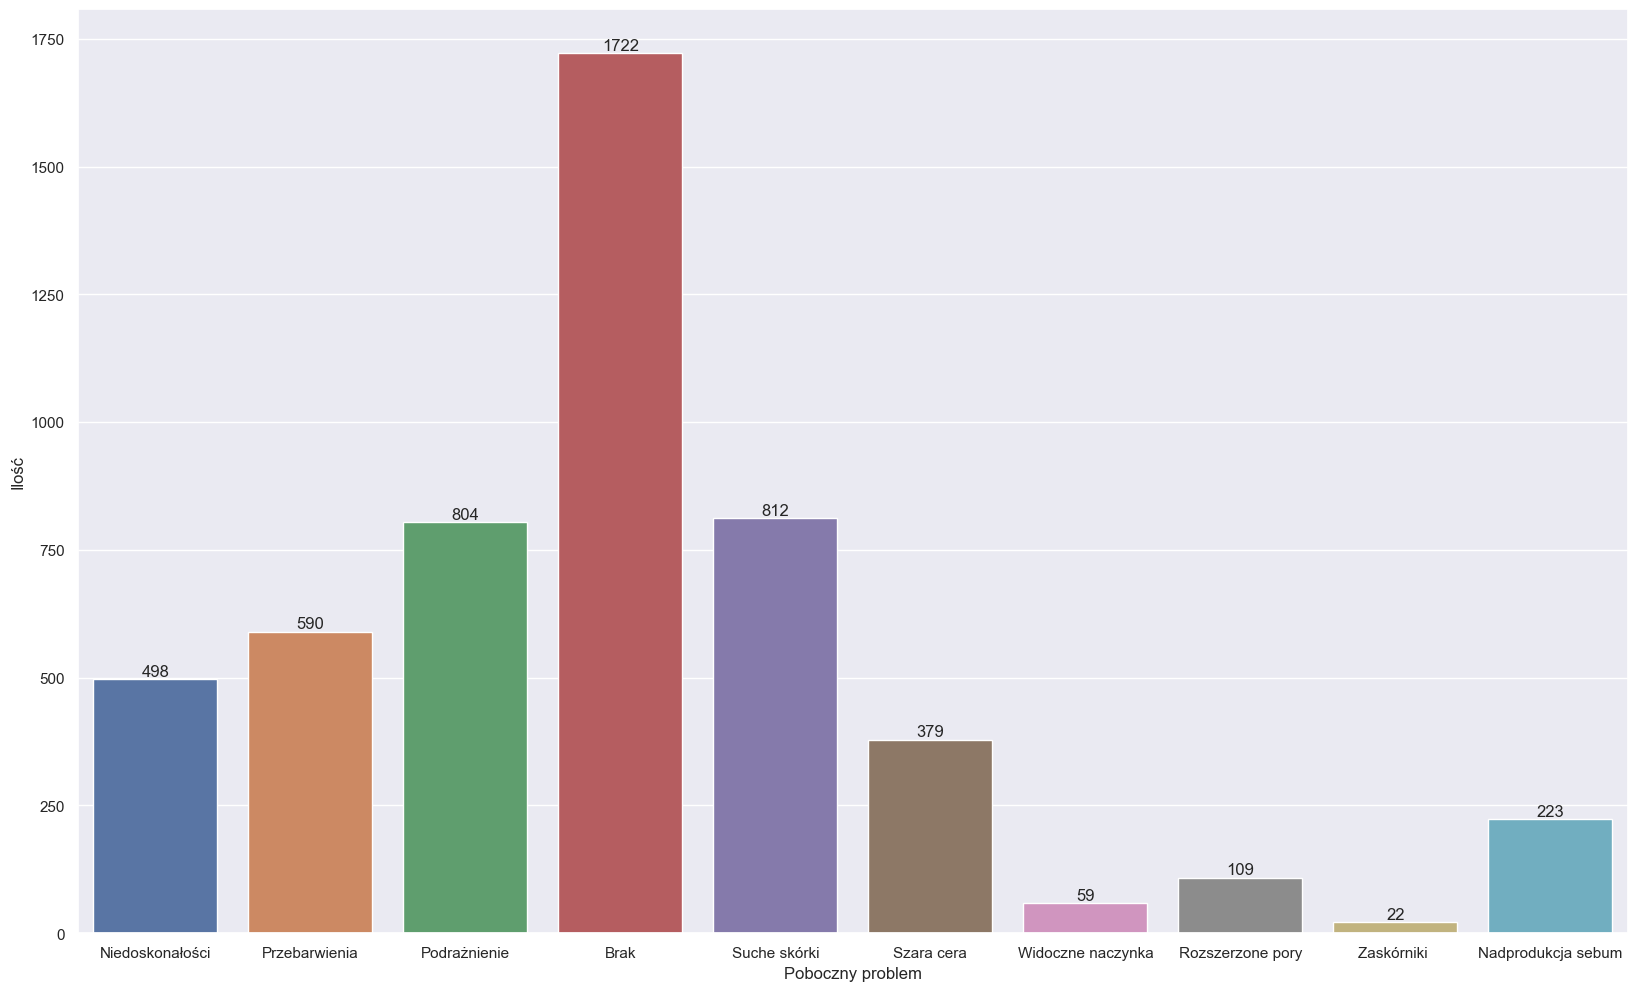

In [30]:
secondIssue = sn.countplot(x="Poboczny problem", data=dataset)
secondIssue.set(ylabel='Ilość')
secondIssue.bar_label(secondIssue.containers[0])

[Text(0, 0, '282'),
 Text(0, 0, '594'),
 Text(0, 0, '537'),
 Text(0, 0, '457'),
 Text(0, 0, '509'),
 Text(0, 0, '435'),
 Text(0, 0, '400'),
 Text(0, 0, '363'),
 Text(0, 0, '349'),
 Text(0, 0, '261'),
 Text(0, 0, '249'),
 Text(0, 0, '189'),
 Text(0, 0, '149'),
 Text(0, 0, '114'),
 Text(0, 0, '81'),
 Text(0, 0, '68'),
 Text(0, 0, '59'),
 Text(0, 0, '37'),
 Text(0, 0, '32'),
 Text(0, 0, '23'),
 Text(0, 0, '22'),
 Text(0, 0, '8')]

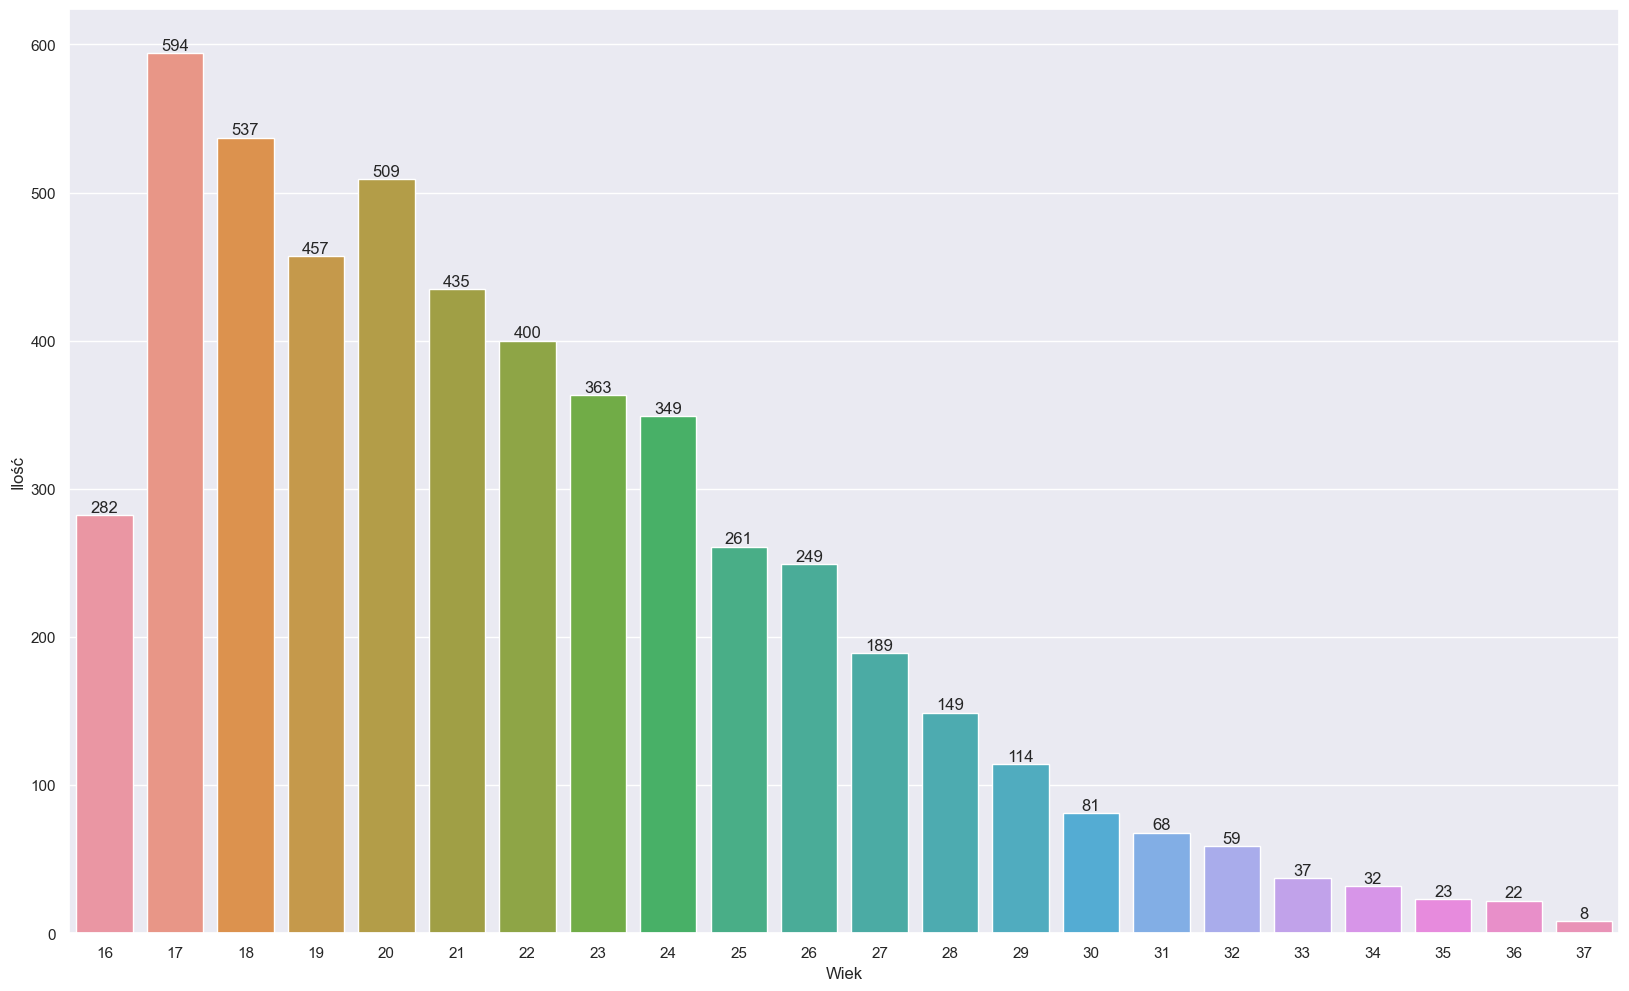

In [31]:
age = sn.countplot(x="Wiek", data=dataset)
age.set(ylabel='Ilość')
age.bar_label(age.containers[0])